# Tutorial - Transformaciones de imágenes en dominio del espacio

Durante la semana hemos visto como manipular imágenes en el dominio del espacio
En este tutorial abordaremos los siguientes conceptos:

- Ecualización de imágenes
- Transformaciones geométricas
- Ejemplo sencillo de segmentación de imágenes

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Equalización de imágenes

In [2]:
waterfall_gray = cv2.imread('cascada.jpg', cv2.IMREAD_GRAYSCALE)

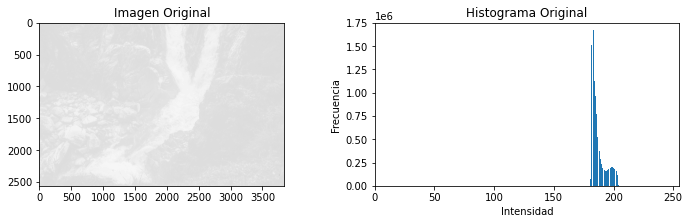

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axes[0].set_title("Imagen Original")
axes[0].imshow(waterfall_gray, cmap='gray')

axes[1].set_title("Histograma Original")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xlabel("Intensidad")
axes[1].set_xlim((0, 255))
axes[1].hist(waterfall_gray.ravel(), bins=255)

plt.show()

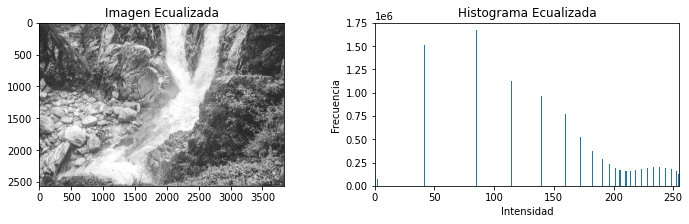

In [4]:
equalized = cv2.equalizeHist(waterfall_gray)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axes[0].set_title("Imagen Ecualizada")
axes[0].imshow(equalized, cmap='gray')

axes[1].set_title("Histograma Ecualizada")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xlabel("Intensidad")
axes[1].set_xlim((0, 255))
axes[1].hist(equalized.ravel(), bins=255)

plt.show()

# Transformaciones geométricas

Ahora veremos algunas transformaciones geométricas que se pueden hacer usando la librería OpenCV. Pueden encontrar más detalles en el siguiente tutorial: https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html

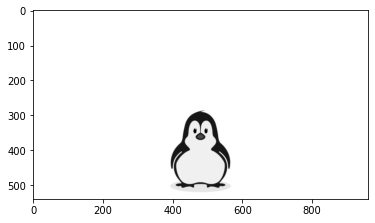

In [5]:
image = cv2.imread('pinguino.jpeg', cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape

plt.imshow(image, cmap='gray')

## Translación

Las translaciones requieren especificar:

- Num. de pixeles para transladar en el eje x
- Num. de pixeles para transladar en el eje y
- Factor para reescalar la imagen en el eje x (1 para mantener tamaño) 
- Factor para reescalar la imagen en el eje y (1 para mantener tamaño) 

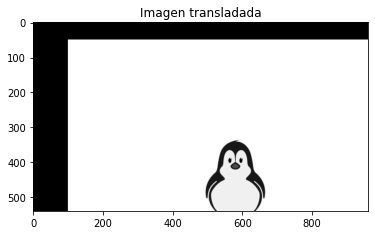

In [6]:
tx = 100 # Num. de pixeles para transladar en el eje x
ty = 50  # Num. de pixeles para transladar en el eje x
scale_x = 1
scale_y = 1

M = np.float32([[scale_x,0,tx],[0,scale_y,ty]])
dst = cv2.warpAffine(image, M, (cols,rows))

plt.title("Imagen transladada")
plt.imshow(dst, cmap='gray')


In [7]:
M

array([[  1.,   0., 100.],
       [  0.,   1.,  50.]], dtype=float32)

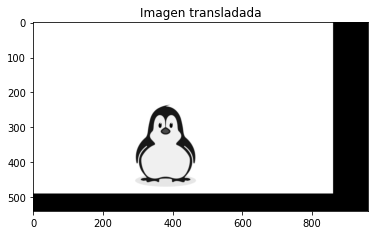

In [8]:
tx = -100 # Num. de pixeles para transladar en el eje x
ty = -50  # Num. de pixeles para transladar en el eje x
scale_x = 1
scale_y = 1

M = np.float32([[scale_x,0,tx],[0,scale_y,ty]])
dst = cv2.warpAffine(image, M, (cols,rows))

plt.title("Imagen transladada")
plt.imshow(dst, cmap='gray')

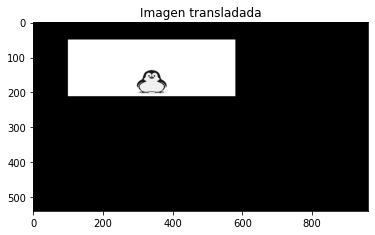

In [9]:
tx = 100 # Num. de pixeles para transladar en el eje x
ty = 50  # Num. de pixeles para transladar en el eje x
scale_x = 0.5
scale_y = 0.3

M = np.float32([[scale_x,0,tx],[0,scale_y,ty]])
dst = cv2.warpAffine(image, M, (cols,rows))

plt.title("Imagen transladada")
plt.imshow(dst, cmap='gray')


In [10]:
M

array([[  0.5,   0. , 100. ],
       [  0. ,   0.3,  50. ]], dtype=float32)

## Rotación

Las rotaciones requieren especificar:

- Un punto entorno al cual se quiere rotar
- Un ángulo de rotación
- Factor para reescalar la imagen (1 para mantener tamaño)

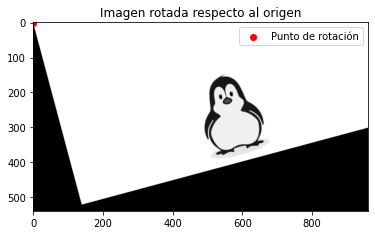

In [11]:
rotation_point = (0, 0)
angle = 15
scale = 1

M = cv2.getRotationMatrix2D(rotation_point, angle, scale)
dst = cv2.warpAffine(image, M, (cols,rows))

plt.title("Imagen rotada respecto al origen")
plt.imshow(dst, cmap='gray')
plt.scatter(*rotation_point, color='r', label='Punto de rotación')
plt.legend()

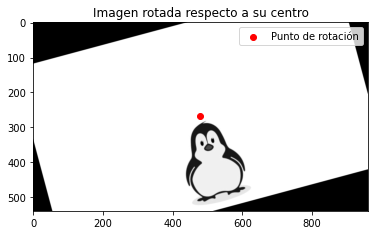

In [12]:
rotation_point = ((cols-1)//2.0, (rows-1)//2.0) # Pixel del centro de la imagen
angle = 15
scale = 1

M = cv2.getRotationMatrix2D(rotation_point, angle, scale)
dst = cv2.warpAffine(image, M, (cols,rows))

plt.title("Imagen rotada respecto a su centro")
plt.imshow(dst, cmap='gray')
plt.scatter(*rotation_point, color='r', label='Punto de rotación')
plt.legend()

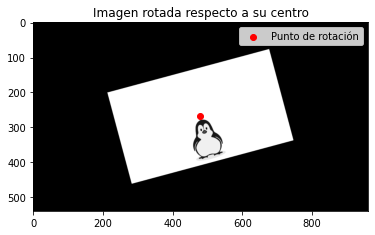

In [13]:
rotation_point = ((cols-1)//2.0, (rows-1)//2.0) # Pixel del centro de la imagen
angle = 15
scale = 0.5

M = cv2.getRotationMatrix2D(rotation_point, angle, scale)
dst = cv2.warpAffine(image, M, (cols,rows))

plt.title("Imagen rotada respecto a su centro")
plt.imshow(dst, cmap='gray')
plt.scatter(*rotation_point, color='r', label='Punto de rotación')
plt.legend()

# Operaciones aritméticas y operaciones lógicas

En este ejemplo tenemos un pingüino que está perdido y queremos devolverlo a su hogar en la antartida. Para ayudarlo, usaremos operaciones aritméticas y lógicas.

In [14]:
penguin_rgb = cv2.imread('pinguino.jpeg', cv2.IMREAD_COLOR)[:, :, ::-1] 
penguin_gray = cv2.imread('pinguino.jpeg', cv2.IMREAD_GRAYSCALE)

antartida_rgb = cv2.imread('antartida.jpeg', cv2.IMREAD_COLOR)[:, :, ::-1] 
antartida_gray = cv2.imread('antartida.jpeg', cv2.IMREAD_GRAYSCALE)

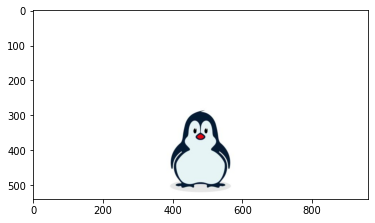

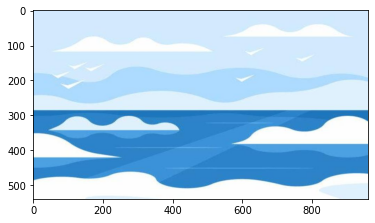

In [15]:
plt.imshow(penguin_rgb)
plt.show()

plt.imshow(antartida_rgb)
plt.show()

## Filtro 

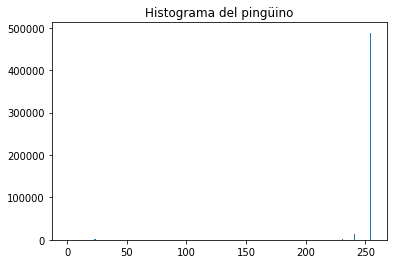

In [16]:
plt.title("Histograma del pingüino")
plt.hist(penguin_gray.ravel(), bins=255)
plt.show()

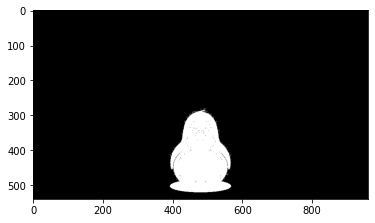

In [18]:
penguin_mask = penguin_gray < 250
plt.imshow(penguin_mask, cmap='gray')
plt.show()

## Multiplicación

Para quitar el fondo blanco, aplicamos la mascara a los tres canales de la imagen a color.

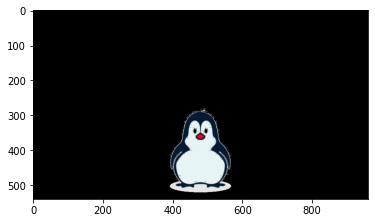

In [19]:
rgb_mask = np.stack([penguin_mask,penguin_mask,penguin_mask], axis=-1)
masked_penguin = np.multiply(penguin_rgb, rgb_mask)

plt.imshow(masked_penguin, cmap='gray')

Ahora debemos hacer espacio en la imagen del fondo para poder poner al pingüino.  
Para esto, invertimos la máscara usando la operación lógica NOT (símbolo ~ en Python). 

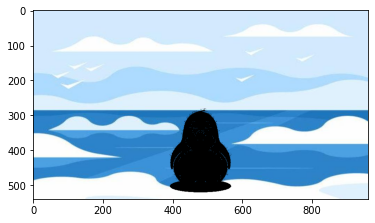

In [20]:
inverse_rgb_mask = ~rgb_mask
masked_background = np.multiply(antartida_rgb, inverse_rgb_mask)

plt.imshow(masked_background, cmap='gray')

## Adición

Finalmente, podemos sumar las imágenes sin problema y el pingüino es devuelto a su hogar.

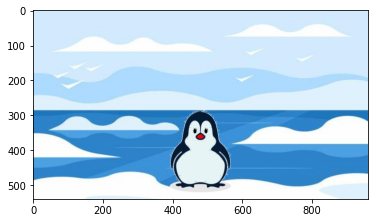

In [21]:
img_added = cv2.add(masked_background, masked_penguin)
plt.imshow(img_added)